# WISE Infilling Example

Example of using proc_continuous to infill an arbitrary masked region of an image. This examples uses a subimage from the WISE 12 um dust map (tile 115).

Requires Julia Kernel

In [3]:
# Load needed packages

using Pkg
using FITSIO
using StatsBase
using CloudClean
using CairoMakie
using ColorSchemes
using OffsetArrays

In [4]:
#parameters. right click - format cell - mark as parameters
# This cell must be tagged with "parameters"

image_path = "default/image/path.fits"
mask_path = "default/mask/path.fits"
save_path = "default/save/path.fits"

"default/save/path.fits"

In [5]:
# Parameters
mask_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\ngc1365_F770W\\Source_Removal\\_CDDfs0004pix_CDDfs0004pix_F770W_CDDfs_sources_S2N_mask.fits"
image_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\OriginalImages\\ngc1365_F770W_JWST_Emission_starsub.fits"
save_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\ngc1365_F770W\\Source_Removal\\OriginalImageSourcesRemoved.fits"
widx = 275


275

In [6]:
using FITSIO

# --- Open the FITS file safely ---
f = FITS(image_path)

# Function to safely extract image + header from possible HDU indices
function get_image_data(f::FITS)
    possible_hdus = [1, 2, 3, 0]  # try these HDUs in order
    for h in possible_hdus
        try
            hdu = f[h]
            # Check that this HDU actually contains image data
            if isa(hdu, ImageHDU)
                data = read(hdu)
                hdr = read_header(hdu)
                return data, hdr
            end
        catch e
            # Silently skip if index is out of range or unreadable
            continue
        end
    end
    error(" No valid ImageHDU found in FITS file. Tried HDUs [0,1,2,3].")
end

raw_image, header = get_image_data(f)

out_image = copy(raw_image)

out_image[isnan.(raw_image)] .= 0.0

close(f)


In [7]:
# Mask with missing pixels
f = FITS(mask_path)
raw_mask = read(f[1])
close(f)

# Convert the raw mask data into a boolean mask (True for masked pixels, False otherwise)
bimage = raw_mask .!= 0  # Create a boolean mask, True where non-zero

# Now bimage is a boolean array with True for masked pixels and False for unmasked pixels
println("Mask shape: ", size(bimage))

Mask shape: 

(2206, 1911)


In [8]:
Np = 15
out_image[bimage].= 0
count(bimage)

173023

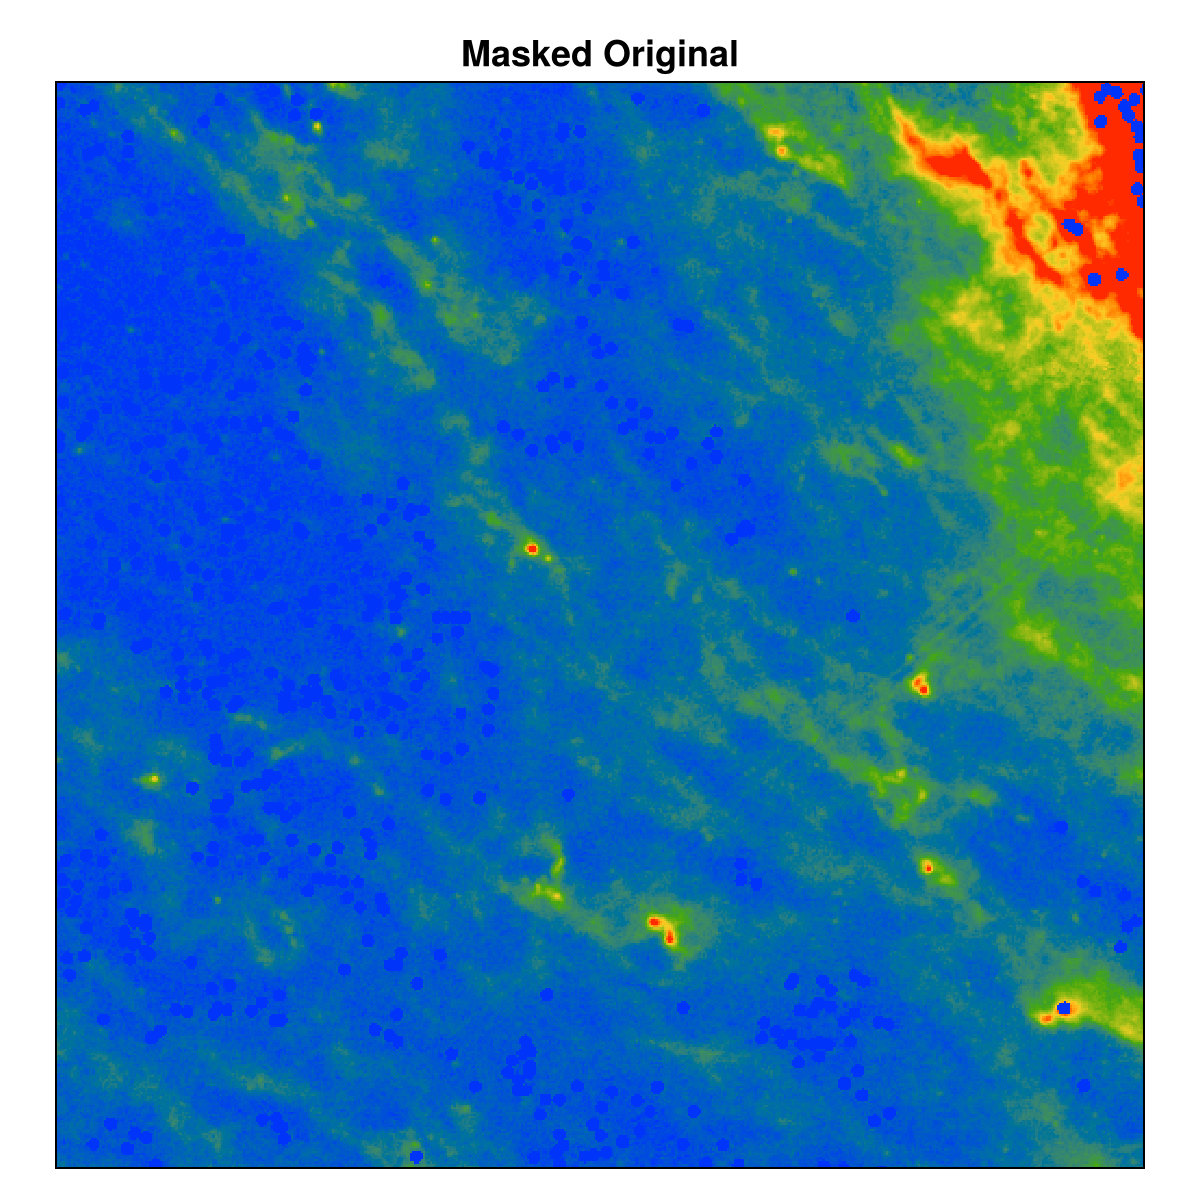

In [9]:
# Example values for cenx, ceny, and dv; adjust these based on your data
cenx = 579
ceny = 579
dv = 250

# Assuming raw_image is your image data and out_image is the image you want to display
# Compute the color range based on percentiles in a region around (cenx, ceny)
vmin, vmax = percentile(out_image[(cenx-dv):(cenx+dv), (ceny-dv):(ceny+dv)], [2, 99])

# Create a figure for plotting
fig = Figure(size=(600, 600), fontsize=18)

# Set up the axis with no ticks or labels
ax = Axis(fig[1,1], aspect=1, title="Masked Original", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)

# Display the heatmap using the chosen colormap and the computed color range
h = heatmap!(ax, out_image[(cenx-dv):(cenx+dv), (ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin, vmax)
)

# Resize the figure to fit the layout
resize_to_layout!(fig)

# Show the figure
fig


In [10]:
ndraw0 = 2
x_locs = [cenx]
y_locs = [ceny]
star_stats = proc_continuous(out_image,bimage,Np=Np,tilex=4,ftype=64,widx=widx,seed=2022,ndraw=ndraw0)


# Debug: Check the structure of star_stats
if isa(star_stats, Tuple)
    println("star_stats is a tuple with length: ", length(star_stats))
    for i in 1:length(star_stats)
        println("star_stats[$i] has type: ", typeof(star_stats[i]), " and size: ", size(star_stats[i]))
    end
else
    println("star_stats is not a tuple. It has type: ", typeof(star_stats))
end

Infilling completed after 1 rounds with final width (widx,widy) = (27,27)


Finished 305 of 9361 locations in tile (1, 1)


Finished 358 of 11219 locations in tile (1, 2)


Finished 349 of 10451 locations in tile (1, 3)


Finished 58 of 2042 locations in tile (1, 4)


Finished 646 of 19982 locations in tile (2, 1)


Finished 506 of 17212 locations in tile (2, 2)


Had to use SVD for sqrt_cov at (x,y) = (947,1189)


Had to use SVD for icov_kgood_kgood at (x,y) = (948,1198)


Had to use SVD for sqrt_cov at (x,y) = (948,1198)
Had to use SVD for icov_kgood_kgood at (x,y) = (944,1214)
Had to use SVD for sqrt_cov at (x,y) = (944,1214)
Had to use SVD for icov_kgood_kgood at (x,y) = (935,1217)
Had to use SVD for sqrt_cov at (x,y) = (935,1217)
Had to use SVD for icov_kgood_kgood at (x,y) = (919,1213)
Had to use SVD for sqrt_cov at (x,y) = (919,1213)
Had to use SVD for sqrt_cov at (x,y) = (892,1196)
Had to use SVD for sqrt_cov at (x,y) = (884,1194)
Had to use SVD for icov_kgood_kgood at (x,y) = (891,1204)
Had to use SVD for sqrt_cov at (x,y) = (891,1204)
Had to use SVD for sqrt_cov at (x,y) = (954,1250)
Had to use SVD for icov_kgood_kgood at (x,y) = (883,1202)
Had to use SVD for sqrt_cov at (x,y) = (883,1202)
Had to use SVD for icov_kgood_kgood at (x,y) = (894,1214)
Had to use SVD for sqrt_cov at (x,y) = (894,1214)
Had to use SVD for icov_kgood_kgood at (x,y) = (885,1221)
Had to use SVD for sqrt_cov at (x,y) = (885,1221)


Had to use SVD for icov_kgood_kgood at (x,y) = (921,1249)
Had to use SVD for sqrt_cov at (x,y) = (921,1249)
Had to use SVD for icov_kgood_kgood at (x,y) = (932,1256)
Had to use SVD for sqrt_cov at (x,y) = (932,1256)
Had to use SVD for icov_kgood_kgood at (x,y) = (947,1283)
Had to use SVD for sqrt_cov at (x,y) = (947,1283)
Had to use SVD for icov_kgood_kgood at (x,y) = (952,1291)
Had to use SVD for icov_kgood_kgood at (x,y) = (950,1329)


Had to use SVD for sqrt_cov at (x,y) = (950,1329)
Had to use SVD for icov_kgood_kgood at (x,y) = (844,1277)
Had to use SVD for sqrt_cov at (x,y) = (844,1277)
Had to use SVD for icov_kgood_kgood at (x,y) = (930,1339)
Had to use SVD for sqrt_cov at (x,y) = (930,1339)
Had to use SVD for icov_kgood_kgood at (x,y) = (934,1347)
Had to use SVD for sqrt_cov at (x,y) = (934,1347)
Had to use SVD for icov_kgood_kgood at (x,y) = (926,1347)
Had to use SVD for sqrt_cov at (x,y) = (926,1347)
Had to use SVD for icov_kgood_kgood at (x,y) = (845,1305)
Had to use SVD for sqrt_cov at (x,y) = (845,1305)
Had to use SVD for icov_kgood_kgood at (x,y) = (925,1355)


Had to use SVD for sqrt_cov at (x,y) = (925,1355)
Had to use SVD for icov_kgood_kgood at (x,y) = (851,1316)
Had to use SVD for sqrt_cov at (x,y) = (851,1316)
Had to use SVD for icov_kgood_kgood at (x,y) = (837,1308)
Had to use SVD for sqrt_cov at (x,y) = (837,1308)
Had to use SVD for icov_kgood_kgood at (x,y) = (843,1316)
Had to use SVD for sqrt_cov at (x,y) = (843,1316)
Had to use SVD for icov_kgood_kgood at (x,y) = (818,1297)
Had to use SVD for sqrt_cov at (x,y) = (818,1297)
Had to use SVD for icov_kgood_kgood at (x,y) = (843,1324)
Had to use SVD for sqrt_cov at (x,y) = (843,1324)
Had to use SVD for icov_kgood_kgood at (x,y) = (825,1312)
Had to use SVD for sqrt_cov at (x,y) = (825,1312)
Had to use SVD for icov_kgood_kgood at (x,y) = (835,1326)
Had to use SVD for sqrt_cov at (x,y) = (835,1326)
Had to use SVD for icov_kgood_kgood at (x,y) = (807,1306)
Had to use SVD for sqrt_cov at (x,y) = (807,1306)
Had to use SVD for icov_kgood_kgood at (x,y) = (919,1376)
Had to use SVD for sqrt_cov 


Had to use SVD for sqrt_cov at (x,y) = (827,1325)
Had to use SVD for icov_kgood_kgood at (x,y) = (910,1383)
Had to use SVD for sqrt_cov at (x,y) = (910,1383)
Had to use SVD for icov_kgood_kgood at (x,y) = (846,1353)
Had to use SVD for sqrt_cov at (x,y) = (846,1353)
Had to use SVD for icov_kgood_kgood at (x,y) = (915,1391)
Had to use SVD for sqrt_cov at (x,y) = (915,1391)
Had to use SVD for icov_kgood_kgood at (x,y) = (843,1374)
Had to use SVD for sqrt_cov at (x,y) = (843,1374)
Had to use SVD for icov_kgood_kgood at (x,y) = (793,1340)
Had to use SVD for sqrt_cov at (x,y) = (793,1340)
Had to use SVD for icov_kgood_kgood at (x,y) = (810,1358)


Had to use SVD for sqrt_cov at (x,y) = (810,1358)
Had to use SVD for icov_kgood_kgood at (x,y) = (842,1385)
Had to use SVD for sqrt_cov at (x,y) = (842,1385)
Had to use SVD for icov_kgood_kgood at (x,y) = (794,1357)
Had to use SVD for sqrt_cov at (x,y) = (794,1357)
Had to use SVD for icov_kgood_kgood at (x,y) = (834,1386)
Had to use SVD for sqrt_cov at (x,y) = (834,1386)
Had to use SVD for icov_kgood_kgood at (x,y) = (800,1365)
Had to use SVD for sqrt_cov at (x,y) = (800,1365)
Had to use SVD for icov_kgood_kgood at (x,y) = (805,1373)
Had to use SVD for sqrt_cov at (x,y) = (805,1373)
Had to use SVD for icov_kgood_kgood at (x,y) = (785,1359)
Had to use SVD for sqrt_cov at (x,y) = (785,1359)
Had to use SVD for icov_kgood_kgood at (x,y) = (835,1394)
Had to use SVD for sqrt_cov at (x,y) = (835,1394)
Had to use SVD for icov_kgood_kgood at (x,y) = (812,1381)
Had to use SVD for sqrt_cov at (x,y) = (812,1381)
Had to use SVD for icov_kgood_kgood at (x,y) = (792,1367)
Had to use SVD for sqrt_cov


Had to use SVD for icov_kgood_kgood at (x,y) = (816,1400)
Had to use SVD for sqrt_cov at (x,y) = (816,1400)
Had to use SVD for icov_kgood_kgood at (x,y) = (835,1414)
Had to use SVD for sqrt_cov at (x,y) = (835,1414)
Had to use SVD for icov_kgood_kgood at (x,y) = (823,1408)
Had to use SVD for sqrt_cov at (x,y) = (823,1408)
Had to use SVD for icov_kgood_kgood at (x,y) = (787,1388)
Had to use SVD for sqrt_cov at (x,y) = (787,1388)
Had to use SVD for icov_kgood_kgood at (x,y) = (815,1410)
Had to use SVD for sqrt_cov at (x,y) = (815,1410)
Had to use SVD for icov_kgood_kgood at (x,y) = (806,1409)
Had to use SVD for sqrt_cov at (x,y) = (806,1409)
Had to use SVD for icov_kgood_kgood at (x,y) = (816,1418)
Had to use SVD for sqrt_cov at (x,y) = (816,1418)
Had to use SVD for icov_kgood_kgood at (x,y) = (793,1407)
Had to use SVD for sqrt_cov at (x,y) = (793,1407)
Had to use SVD for icov_kgood_kgood at (x,y) = (795,1416)
Had to use SVD for sqrt_cov at (x,y) = (795,1416)
Had to use SVD for icov_kgo


Had to use SVD for sqrt_cov at (x,y) = (695,1394)
Had to use SVD for icov_kgood_kgood at (x,y) = (682,1388)
Had to use SVD for sqrt_cov at (x,y) = (682,1388)
Had to use SVD for icov_kgood_kgood at (x,y) = (699,1405)
Had to use SVD for sqrt_cov at (x,y) = (699,1405)
Had to use SVD for icov_kgood_kgood at (x,y) = (710,1417)
Had to use SVD for sqrt_cov at (x,y) = (710,1417)
Had to use SVD for icov_kgood_kgood at (x,y) = (669,1383)
Had to use SVD for sqrt_cov at (x,y) = (669,1383)
Had to use SVD for icov_kgood_kgood at (x,y) = (714,1425)
Had to use SVD for sqrt_cov at (x,y) = (714,1425)
Had to use SVD for icov_kgood_kgood at (x,y) = (690,1406)
Had to use SVD for sqrt_cov at (x,y) = (690,1406)
Had to use SVD for icov_kgood_kgood at (x,y) = (718,1433)
Had to use SVD for sqrt_cov at (x,y) = (718,1433)
Had to use SVD for icov_kgood_kgood at (x,y) = (667,1391)
Had to use SVD for sqrt_cov at (x,y) = (667,1391)
Had to use SVD for icov_kgood_kgood at (x,y) = (696,1419)
Had to use SVD for sqrt_cov


Had to use SVD for icov_kgood_kgood at (x,y) = (584,1342)
Had to use SVD for sqrt_cov at (x,y) = (584,1342)
Had to use SVD for icov_kgood_kgood at (x,y) = (647,1417)
Had to use SVD for sqrt_cov at (x,y) = (647,1417)
Had to use SVD for icov_kgood_kgood at (x,y) = (656,1428)
Had to use SVD for sqrt_cov at (x,y) = (656,1428)
Had to use SVD for icov_kgood_kgood at (x,y) = (623,1395)
Had to use SVD for sqrt_cov at (x,y) = (623,1395)
Had to use SVD for icov_kgood_kgood at (x,y) = (586,1352)
Had to use SVD for sqrt_cov at (x,y) = (586,1352)
Had to use SVD for icov_kgood_kgood at (x,y) = (576,1343)
Had to use SVD for sqrt_cov at (x,y) = (576,1343)
Had to use SVD for icov_kgood_kgood at (x,y) = (645,1425)
Had to use SVD for sqrt_cov at (x,y) = (645,1425)
Had to use SVD for icov_kgood_kgood at (x,y) = (586,1361)
Had to use SVD for sqrt_cov at (x,y) = (586,1361)
Had to use SVD for icov_kgood_kgood at (x,y) = (578,1352)
Had to use SVD for sqrt_cov at (x,y) = (578,1352)
Had to use SVD for icov_kgo


Had to use SVD for icov_kgood_kgood at (x,y) = (569,1404)
Had to use SVD for sqrt_cov at (x,y) = (569,1404)
Finished 644 of 22022 locations in tile (2, 3)


Finished 211 of 6599 locations in tile (2, 4)


Finished 503 of 15506 locations in tile (3, 1)


Finished 149 of 4661 locations in tile (3, 2)


Finished 384 of 12089 locations in tile (3, 3)


Finished 73 of 2463 locations in tile (3, 4)


Finished 417 of 12476 locations in tile (4, 1)


Finished 416 of 12811 locations in tile (4, 2)


Finished 399 of 12214 locations in tile (4, 3)


Finished 67 of 1915 locations in tile (4, 4)


star_stats is a tuple with length: 2


star_stats[1] has type: 

Matrix{

Float64} and size: (2206, 1911)
star_stats[2] has type: OffsetArray{Float64, 3, Array{Float64, 3}} and size: (2206, 1911, 2)


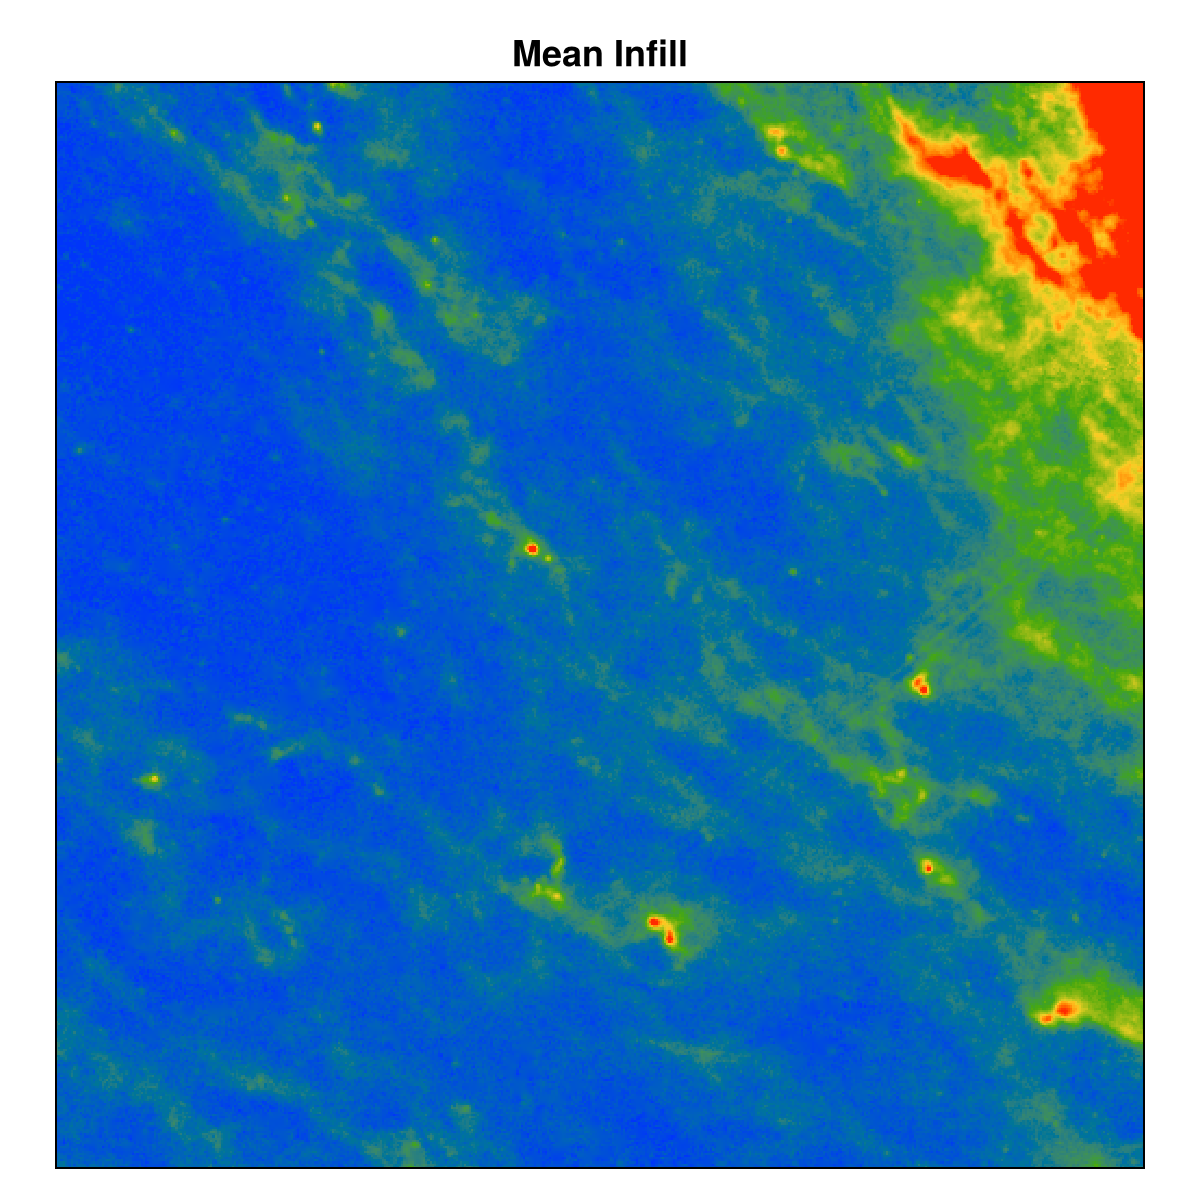

In [11]:
cenx = 579
ceny = 579
dv = 250
vmin, vmax = percentile(out_image[(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)],[2,99])
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Mean Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[1][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig

In [12]:
dv = 250
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Draw Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[2][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv),1]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

# Convert to a standard Array
array_data = max.(parent(star_stats[2]), 0)  # Set negative values to zero

# Open a FITS file and write
FITS(save_path, "w") do f
    write(f, convert(Array, array_data); header = header)  # Ensure it's a proper Array
end

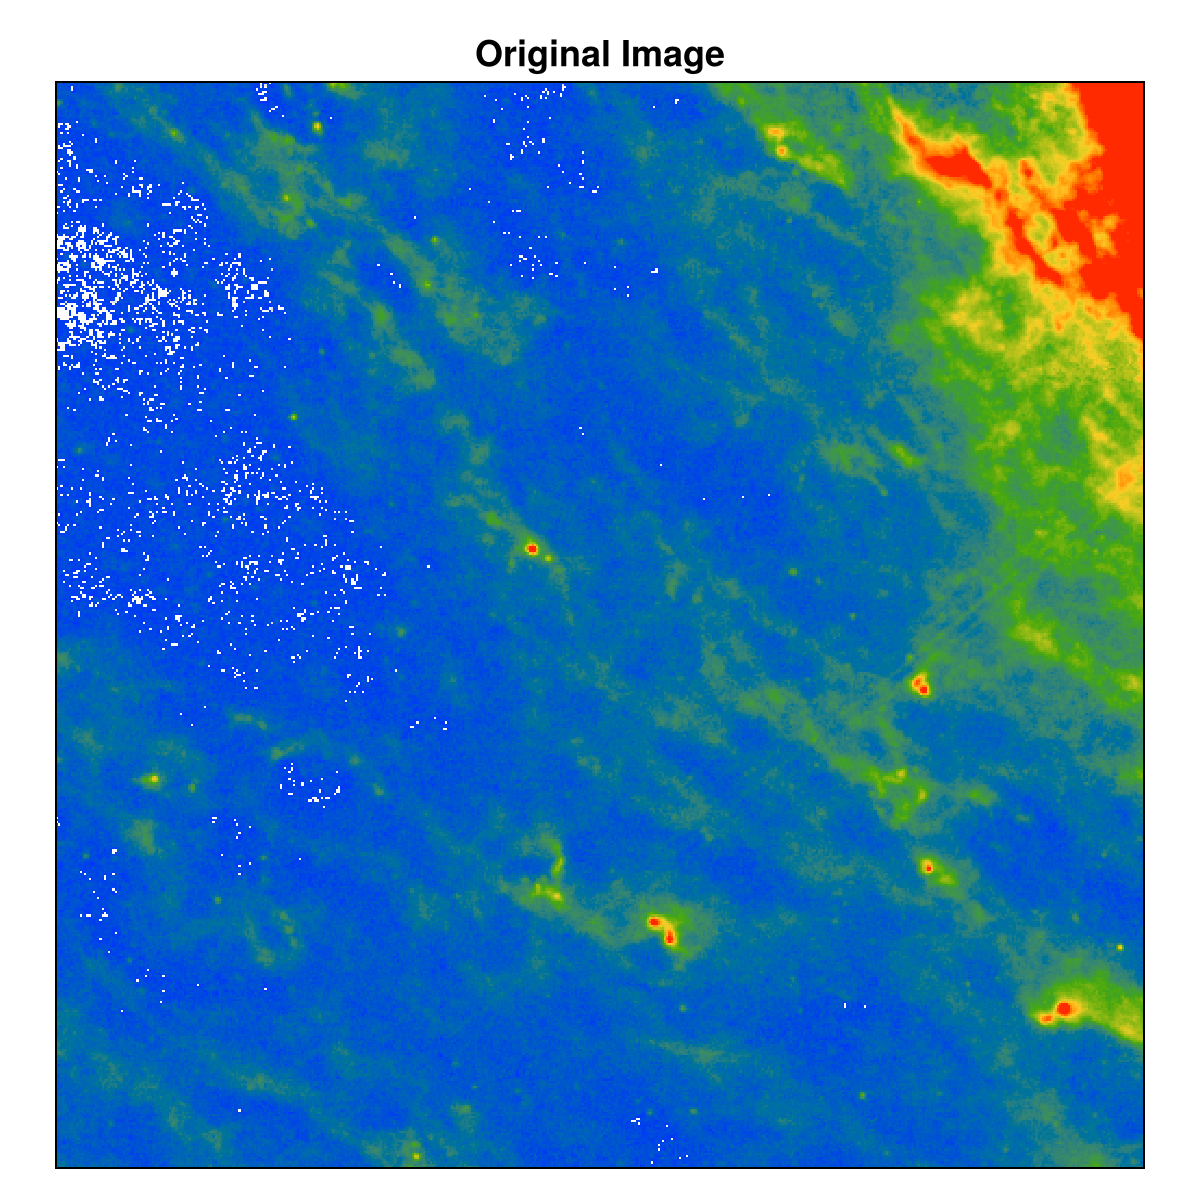

In [13]:
dv = 250
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Original Image", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,raw_image[(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig